In [1]:
import networkx as nx 
import random
import matplotlib.pyplot as plt
import numpy as np 
import math 
import copy 
import graphviz
from scipy.optimize import fsolve
from typing import List
import sympy as sp
from sympy import Symbol
from collections import deque
import pickle
import import_ipynb
from arrival_networkx import Arrival, branch_instance

importing Jupyter notebook from arrival_networkx.ipynb


In [ ]:
def get_hard_instance1(m:int,n:int):
    game = Arrival(m+n)
    
    game.s_0[0] = 1 
    game.s_1[0] = m
    
    for v in range(1,m-1):
        game.s_0[v] = 0
        game.s_1[v] = v+1 
        
    game.s_0[m-1] = 0 
    game.s_1[m-1] = 0
        
    for v in range(m,m+n-1):
        game.s_0[v] = 0
        game.s_1[v] = v+1 
        
    game.s_0[m+n-1] =m+n-1
    game.s_1[m+n-1] =m+n-1
    
    game.s_0 = game.s_0[:-1]
    game.s_1 = game.s_1[:-1]
    game.n = m+n
    
    game.graph = game.get_network_graph()
    game.draw_graph(game.graph)
    
    return game

m = 50
n = 50
hard1 = get_hard_instance1(m,n)

In [ ]:
def get_hard_instance2(m:int,n:int):
    game = Arrival(m+n)
    
    r = random.random()
    game.s_0[0] = 1 if r > 0.5 else m
    game.s_1[0] = 1 if r <= 0.5 else m
    
    for v in range(1,m):
        r = random.random()
        game.s_0[v] = v+1 if r > 0.5 else 0
        game.s_1[v] = v+1 if r <= 0.5 else 0
        
    for v in range(m,m+n):
        r = random.random()
        game.s_0[v] = v+1 if r > 0.5 else 0
        game.s_1[v] = v+1 if r <= 0.5 else 0
    
    game.s_0 = game.s_0[:-1]
    game.s_1 = game.s_1[:-1]
    game.n = m+n
    
    game.graph = game.get_network_graph()
    game.draw_graph(game.graph)
    
    return game

m = 5
n = 5
hard1 = get_hard_instance1(m,n)

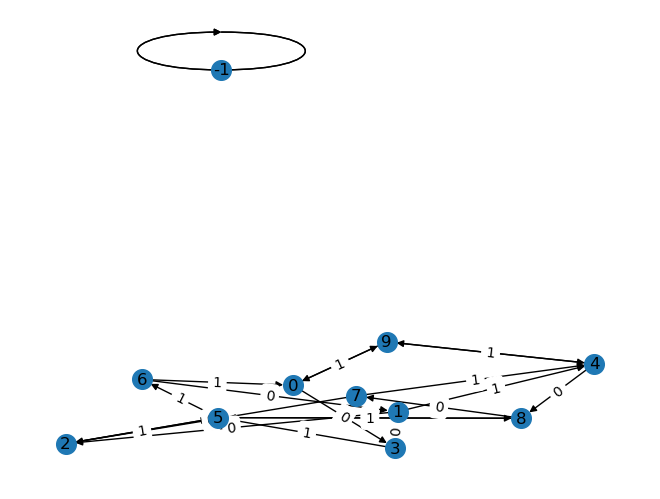

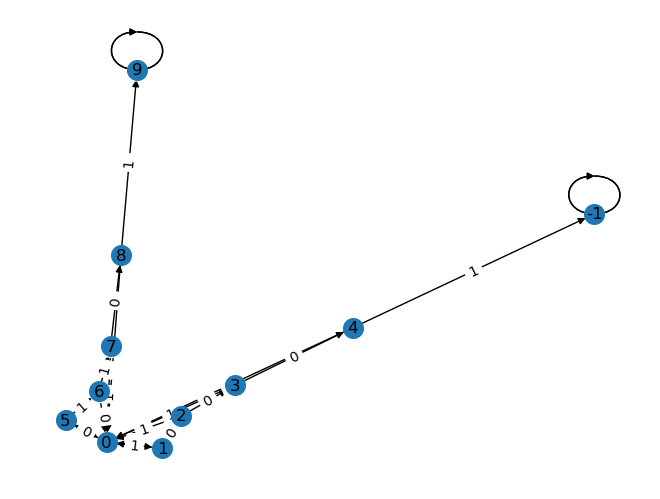

In [2]:
def hard_instance3(size_of_instance:int , split_ratio:float = 0.0):
    if split_ratio == 0.0:
        split_ratio = random.random()
    ## first branch is 0 to m and second branch is m to m+n   
    m = int(split_ratio*size_of_instance) 
    n = size_of_instance 
    game = Arrival(n)
    
    for v in game.vertices:
        if v == game.start_node:
            r = random.random()
            game.s_0[v] = 1 if r > 0.5 else m
            game.s_1[v] = 1 if r <= 0.5 else m
        elif v in [game.target_node, game.sink_node]:
            game.s_0[v] = v
            game.s_1[v] = v
        elif v == m -1 :
            r = random.random()
            game.s_0[v] = 0 if r > 0.5 else -1
            game.s_1[v] = 0 if r <= 0.5 else -1
        else:
            r = random.random()
            game.s_0[v] = v+1 if r > 0.5 else 0
            game.s_1[v] = v+1 if r <= 0.5 else 0
        
        
    game.graph = game.get_network_graph()
    
    game.draw_graph(game.graph)
    game.save_graph(f'./hard_{size_of_instance}_{split_ratio}.gpickle')
    return game
    
    
hard = hard_instance3(10,0.5)

In [12]:
hard.graph.nodes

NodeView((-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [8]:
hard.s_1

[1, 2, 3, 0, 0, 0, 7, 8, 9, 9, -1]

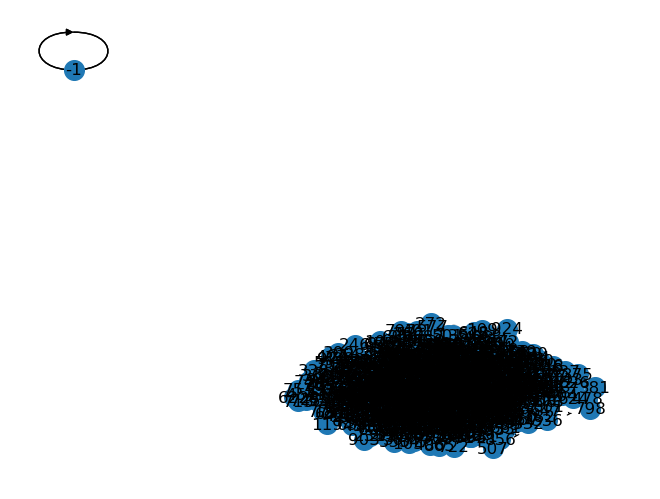

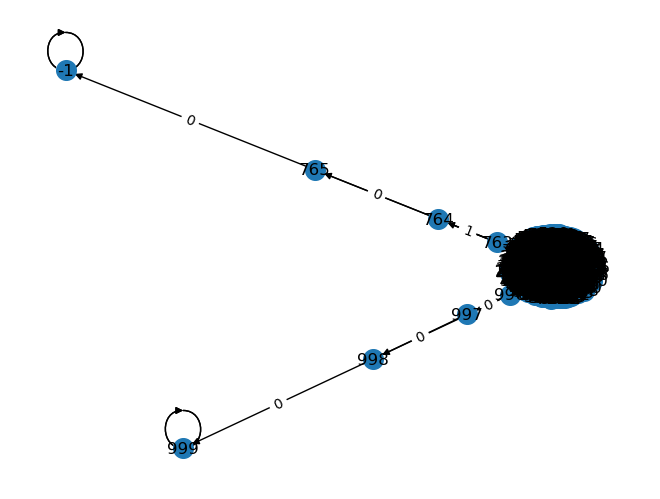

In [3]:
g = branch_instance(1000,0.0)